### 1. The game results:

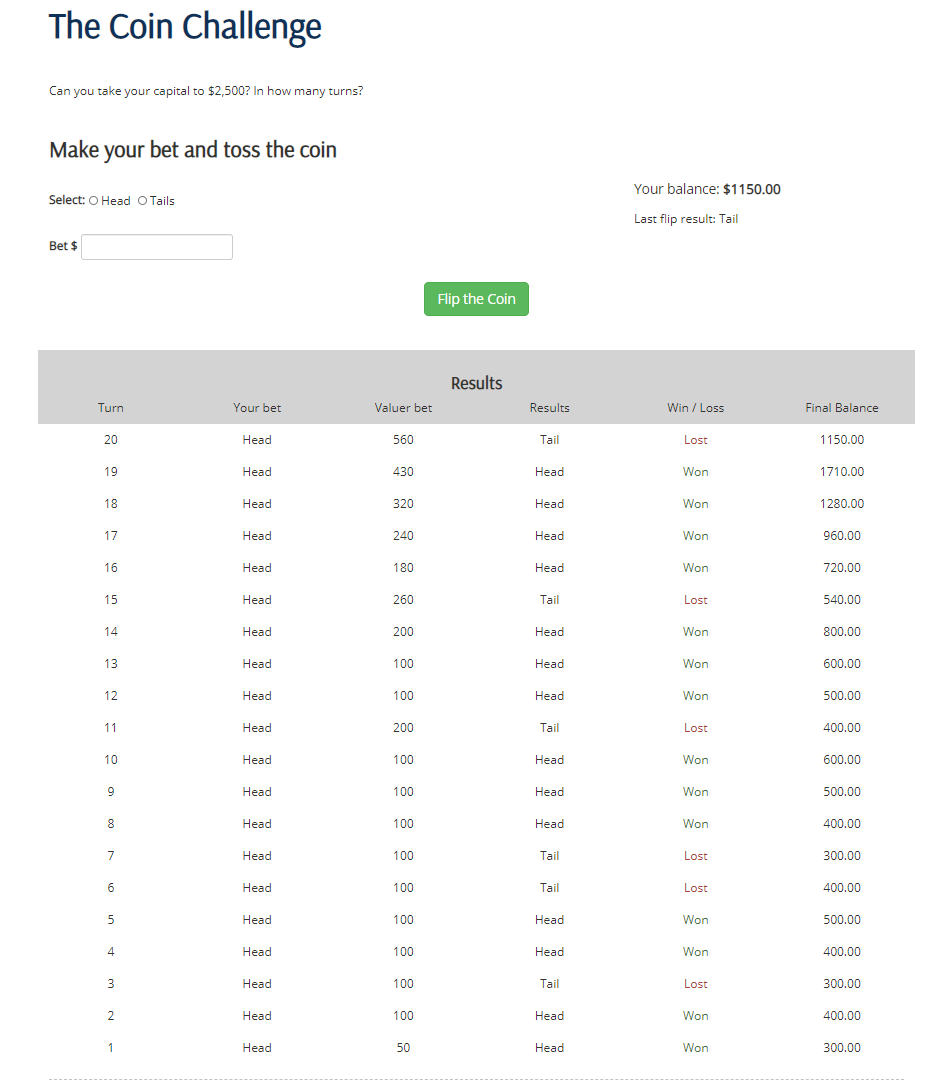

### 2. The chosen strategy:

Always bet Heads. If the amount left is less than 300, bet 50. If the amount if less than 500, bet 100. Otherwise, bet 1/3 of what is left.

I was trying to choose a simple strategy, but felt like betting 1/2 is too much.

### 3. Trying out the strategy with the code:

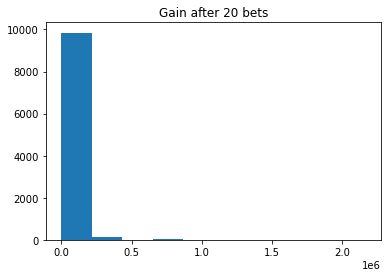

The average gain is $21550.653458627134
The 95% confidence interval is[7.407407407407391, 138637.31791428305]
The number of times when earned less than $250 is 6.6000000000000005%


In [116]:
import numpy as np
from matplotlib import pyplot as plt

trials = []

def bet(money):
    
    my_bet = 0
    
    if money < 50:
        return money
    
    if money <= 300:
        my_bet = 50
    elif money <= 500:
        my_bet = 100
    else:
        my_bet = money/3
        
    if np.random.rand() < 0.6:
        money = money + my_bet*2
    else:
        money = money - my_bet
    
    return money

def game():
    
    money = 250
    
    for i in range(20):
        if money > 0:
            money = bet(money)
        else:
            break
        
    return money

for k in range(10000):
    trials.append(game())
    
plt.hist(trials)
plt.title('Gain after 20 bets')
plt.show()

print(f'The average gain is ${np.mean(trials)}')
print(f'The 95% confidence interval is[{np.percentile(trials, 2.5)}, {np.percentile(trials, 97.5)}]')

count = 0

for i in trials:
    if i < 250:
        count += 1

print(f'The number of times when earned less than $250 is {count/10000*100}%')